###Task 1 and Task 2

In [142]:
import numpy as np
import random#not used
import torch
from torchvision import datasets, transforms

def load_mnist():
    transform = transforms.Compose([transforms.ToTensor()])
    train_dataset = datasets.MNIST(root="https://www.kaggle.com/datasets/hojjatk/mnist-dataset", train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root="https://www.kaggle.com/datasets/hojjatk/mnist-dataset", train=False, download=True, transform=transform)
    return train_dataset, test_dataset

def filter_and_sample(dataset, classes=[0, 1, 2], num_samples=100):
    images, labels = [], []
    class_counts = {c: 0 for c in classes}

    # Shuffle the dataset to ensure random sampling
    indices = torch.randperm(len(dataset))
    dataset = [dataset[i] for i in indices]

    for img, label in dataset:
        if label in classes and class_counts[label] < num_samples:
            img = img / 255.0#_normalized
            images.append(img.view(-1).numpy())  # Flatten to vector
            labels.append(label)
            class_counts[label] += 1

        if all(class_counts[c] == num_samples for c in classes):
            break

    return np.array(images), np.array(labels)

def compute_mle(X, y):
    classes = np.unique(y)
    mean_vectors = {}
    covariance_matrices = {}

    for c in classes:
        X_c = X[y == c]
        #mean_vectors[c] = np.mean(X_c, axis=0)
        #covariance_matrices[c] = np.cov(X_c, rowvar=False) + np.eye(X_c.shape[1]) * 1e-6  # Regularization- to ensure the covariance matrix is positive  definite and invertible, especially when the number of samples is small compared to the dimensionality of the data.
        X_c = X[y == c]
        N_c = X_c.shape[0]  # Number of samples in class c

        # Compute mean vector explicitly
        mean_vectors[c] = np.sum(X_c, axis=0) / N_c

        # Center the data (subtract mean)
        X_c_centered = X_c - mean_vectors[c]

        # Compute covariance matrix explicitly
        cov_matrix = np.zeros((X_c.shape[1], X_c.shape[1]))  # Initialize covariance matrix
        for i in range(N_c):
            cov_matrix += np.outer(X_c_centered[i], X_c_centered[i])  # Outer product
        cov_matrix /= N_c

        # Add regularization to ensure positive definiteness
        regularization = np.eye(X_c.shape[1]) * 1e-6
        covariance_matrices[c] = cov_matrix + regularization
    return mean_vectors, covariance_matrices

# Load and preprocess MNIST step 1
data_train, data_test = load_mnist()
X_train, y_train = filter_and_sample(data_train)
X_test, y_test = filter_and_sample(data_test)

# Compute MLE parameters
mean_vectors, covariance_matrices = compute_mle(X_train, y_train)
print(covariance_matrices)
# Display results
for c in mean_vectors:
    print(f"Class {c}: Mean Vector Shape: {mean_vectors[c].shape}, Covariance Matrix Shape: {covariance_matrices[c].shape}")


{0: array([[1.e-06, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-06, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e-06, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [0.e+00, 0.e+00, 0.e+00, ..., 1.e-06, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 1.e-06, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 1.e-06]]), 1: array([[1.e-06, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-06, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e-06, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [0.e+00, 0.e+00, 0.e+00, ..., 1.e-06, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 1.e-06, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 1.e-06]]), 2: array([[1.e-06, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 1.e-06, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 1.e-06, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [0.e+00, 0.e+

In [ ]:
def visualize_2d(X, y, title):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}')
    plt.title(title)
    plt.legend()
    plt.show()


###Task 3: PCA

In [ ]:
from sklearn.decomposition import PCA  # with library funcyion first to compare with formula method
def apply_pca(X, variance_retained=0.95):
    pca = PCA(n_components=variance_retained)
    X_pca = pca.fit_transform(X)
    return X_pca, pca

# Apply PCA to retain 95% variance
X_train_pca, pca_model = apply_pca(X_train)
X_test_pca = pca_model.transform(X_test)

print(f"Reduced dimensionality: {X_train_pca.shape}")
print(f"Reduced test dimensionality: {X_test_pca.shape[1]}")
print("Shape of X_train:",X_train.T.shape)# obtain X for pca

Reduced dimensionality: (300, 82)
Reduced test dimensionality: 82
Shape of X_train: (784, 300)


In [ ]:
print("Shape of X_train:",X_train.shape)# obtain X for pca, on paper we need shape of X_train.T, but ignoring that for consistency with code
def apply_pca_manual(X, variance_retained=0.95):
    # Compute mean
    #mean_X = np.mean(X, axis=0)
    #mu = np.mean(X, axis=1, keepdims=True)
    mean_X=np.sum(X, axis=0) / X.shape[0]

    # Center the data
    X_centered = X - mean_X

    # Compute covariance matrix
    covariance_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)#S

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select top components to retain 95% variance
    total_variance = np.sum(eigenvalues)
    explained_variance = np.cumsum(eigenvalues) / total_variance
    num_components = np.searchsorted(explained_variance, variance_retained) + 1 #np.argmax(explained_variance >= variance_retained) + 1
    U_p = eigenvectors[:, :num_components]

    # Transform data
    Y = np.dot(X_centered, U_p)
    return Y, U_p, mean_X, covariance_matrix, eigenvalues, eigenvectors

# Apply manual PCA and retain 95% variance
Y_train, U_p, mean_X, covariance_matrix, eigenvalues, eigenvectors = apply_pca_manual(X_train)
Y_test = np.dot(X_test - mean_X, U_p)
print(f"Reduced dimensionality: {Y_train.shape[1]}")
print("Original data shape:", X_train.shape)
print("Reduced data shape:", Y_train.shape)
print("Number of principal components retained:", U_p.shape[1])



Shape of X_train: (300, 784)
Reduced dimensionality: 82
Original data shape: (300, 784)
Reduced data shape: (300, 82)
Number of principal components retained: 82


In [ ]:
from scipy.stats import multivariate_normal
def train_lda(Y_train, y_train):
    classes = np.unique(y_train)
    mean_vectors = {}
    shared_covariance = np.zeros((Y_train.shape[1], Y_train.shape[1]))

    for c in classes:
        Y_c = Y_train[y_train == c]
        mean_vectors[c] = np.mean(Y_c, axis=0)# can use formula as well, already used above for both mean and covariance
        shared_covariance += np.cov(Y_c, rowvar=False) * (len(Y_c) - 1)

    shared_covariance /= (len(Y_train) - len(classes))
    return mean_vectors, shared_covariance

def classify_lda(Y_test, mean_vectors, shared_covariance):
    inv_cov = np.linalg.inv(shared_covariance)
    predictions = []

    for y in Y_test:
        scores = {c: -0.5 * np.dot(np.dot((y - mean_vectors[c]).T, inv_cov), (y - mean_vectors[c])) for c in mean_vectors}
        predictions.append(max(scores, key=scores.get))

    return np.array(predictions)

def train_qda(Y_train, y_train):
    classes = np.unique(y_train)
    mean_vectors = {}
    covariance_matrices = {}

    for c in classes:
        Y_c = Y_train[y_train == c]
        mean_vectors[c] = np.mean(Y_c, axis=0)
        covariance_matrices[c] = np.cov(Y_c, rowvar=False) + np.eye(Y_c.shape[1]) * 1e-6  # Regularization

    return mean_vectors, covariance_matrices

def classify_qda(Y_test, mean_vectors, covariance_matrices):
    predictions = []

    for y in Y_test:
        scores = {c: multivariate_normal.logpdf(y, mean=mean_vectors[c], cov=covariance_matrices[c]) for c in mean_vectors}
        predictions.append(max(scores, key=scores.get))

    return np.array(predictions)
print("train pca\n")
# Train and classify using LDA
lda_means, lda_cov = train_lda(Y_train, y_train)
predictions_lda = classify_lda(Y_train, lda_means, lda_cov)

# Train and classify using QDA
qda_means, qda_covs = train_qda(Y_train, y_train)
predictions_qda = classify_qda(Y_train, qda_means, qda_covs)

# Print classification results
print(f"LDA Predictions: {predictions_lda}")
print(f"QDA Predictions: {predictions_qda}")

# Evaluate accuracy
accuracy_lda = np.mean(predictions_lda == y_train)
accuracy_qda = np.mean(predictions_qda == y_train)

print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)
print("\ntest pca\n")
# Train and classify using LDA
lda_means, lda_cov = train_lda(Y_test, y_test)
predictions_lda = classify_lda(Y_test, lda_means, lda_cov)

# Train and classify using QDA
qda_means, qda_covs = train_qda(Y_test, y_test)
predictions_qda = classify_qda(Y_test, qda_means, qda_covs)

# Print classification results
print(f"LDA Predictions: {predictions_lda}")
print(f"QDA Predictions: {predictions_qda}")

# Evaluate accuracy
accuracy_lda = np.mean(predictions_lda == y_test)
accuracy_qda = np.mean(predictions_qda == y_test)

print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)

train pca

LDA Predictions: [2 0 0 2 1 1 1 2 2 0 2 0 0 0 2 2 2 0 2 0 1 1 0 0 0 0 1 1 2 1 0 2 1 1 2 2 2
 1 1 0 0 2 1 2 0 0 1 2 1 1 2 0 2 2 2 1 0 0 1 0 2 2 2 2 0 0 2 1 1 1 2 1 1 0
 1 2 1 2 2 0 1 0 2 2 0 0 0 0 0 0 0 2 2 0 1 1 2 1 1 2 2 0 2 1 0 2 0 1 1 2 1
 1 2 1 1 1 1 0 1 2 1 2 1 1 2 2 2 1 0 2 0 2 0 2 1 2 1 0 1 0 0 1 1 0 1 2 2 0
 0 0 0 0 1 1 0 1 1 2 0 0 2 0 2 0 0 0 2 2 2 0 2 2 1 2 0 2 0 2 2 0 1 0 2 2 1
 0 1 1 2 2 0 1 2 0 1 2 1 1 0 2 1 0 2 2 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 2 2 0
 2 1 0 0 1 0 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 0 2 1 2 0 1 2 0 0 0 2 2 1 2 0 1
 1 1 2 2 1 1 2 1 2 2 0 1 0 1 1 0 0 1 1 2 0 1 1 1 1 1 2 2 2 0 1 2 0 0 0 0 0
 2 2 2 2]
QDA Predictions: [2 0 0 2 1 1 1 2 2 0 2 0 0 0 2 2 2 0 2 0 1 1 0 0 0 0 1 1 2 1 0 2 1 1 2 2 2
 1 1 0 0 2 1 2 0 0 1 2 1 1 2 0 2 2 2 1 0 0 1 0 2 2 2 2 0 0 2 1 1 1 2 1 1 0
 1 2 1 2 2 0 1 0 2 2 0 0 0 0 0 0 0 2 2 0 1 2 2 1 1 2 2 0 2 1 0 2 0 1 1 2 1
 1 2 1 1 1 1 0 1 2 1 2 1 1 2 2 2 1 0 2 0 2 0 2 1 2 1 0 1 0 0 1 1 0 1 2 2 0
 0 0 0 0 1 1 0 1 1 1 0 0 2 0 2 0 0 0 2 2 2 0 

###Task 4: FDA

In [136]:
def apply_fda(X, y):
    classes = np.unique(y)
    mean_total = np.mean(X, axis=0)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    S_W = np.zeros((X.shape[1], X.shape[1]))

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        S_B += len(X_c) * np.outer(mean_c - mean_total, mean_c - mean_total)
        S_W += np.dot((X_c - mean_c).T, (X_c - mean_c))

    # Regularize S_W to ensure invertibility
    epsilon = 1e-6
    S_W += epsilon * np.eye(S_W.shape[0])

    eigvals, eigvecs = np.linalg.eigh(np.linalg.pinv(S_W).dot(S_B))
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    W = eigvecs[:, :len(classes) - 1]  # Select top C-1 eigenvectors
    Y_fda = np.dot(X, W)
    return Y_fda, W,S_W,S_B


print("After FDA on test set X\n")

X_fda_test, W_fda,S_W,S_B = apply_fda(X_test, y_test)
#Y_fda_test = np.dot(Y_test, W_fda)
print(f"Reduced dimensionality after PCA: {X_train.shape[1]}")
print(f"Reduced dimensionality after FDA: {X_fda_test.shape[1]} and shape: ",X_fda_test.shape )
print("optimal projection matrix W shape: ",W_fda.shape)# as 3 classes hence dX2 dimension of transpose
print("optimal projection matrix W:\n ",W_fda)

print("\nS_W shape: ",S_W.shape)
print("S_W:\n",S_W)

print("\nS_B shape: ",S_B.shape)
print("S_B:\n",S_B)


print("\nS_T shape: ",(S_B+S_W).shape)
print("S_T:\n",S_B+S_W)


After FDA on test set X

Reduced dimensionality after PCA: 82
Reduced dimensionality after FDA: 2 and shape:  (300, 2)
optimal projection matrix W shape:  (82, 2)
optimal projection matrix W:
  [[-7.42625209e-01  9.48911690e-02]
 [-1.22670806e-01 -7.00692868e-01]
 [-3.39874790e-02 -1.03046535e-01]
 [-2.53764078e-02 -9.49598109e-02]
 [ 8.67911509e-02  7.39402114e-02]
 [ 9.28168064e-02 -4.29537289e-02]
 [-1.00881108e-01  1.25972356e-01]
 [ 1.29411236e-02  5.81144070e-02]
 [-5.97870949e-02  7.03619804e-02]
 [ 4.39945241e-02  1.52680935e-03]
 [ 5.02563444e-02  8.00994779e-02]
 [-1.99063994e-01  2.76357131e-02]
 [-9.12592558e-02 -4.36287683e-02]
 [ 6.46670113e-02 -1.09237496e-01]
 [-7.19066715e-02  4.45470793e-03]
 [-6.61424869e-03  2.85371649e-02]
 [-5.55101648e-02  2.16327285e-03]
 [-8.11663486e-02  8.38969610e-02]
 [ 7.43004804e-02  1.69974883e-01]
 [ 3.45068611e-02  5.63407631e-02]
 [-2.14909453e-02 -9.24188440e-02]
 [ 5.59608883e-02  1.87119633e-02]
 [ 5.55402708e-02 -1.04772057e-02]
 

###Task 5: Evaluation, visualiazation

1 FDA

In [143]:
# Train and classify using LDA on fda on test set X
print("After FDA on test set X\n")
lda_means, lda_cov = train_lda(X_fda_test, y_test)
predictions_lda = classify_lda(X_fda_test, lda_means, lda_cov)

# Train and classify using QDA
qda_means, qda_covs = train_qda(X_fda_test, y_test)
predictions_qda = classify_qda(X_fda_test, qda_means, qda_covs)

# Print classification results
print(f"LDA Predictions: {predictions_lda}")
print(f"QDA Predictions: {predictions_qda}")

# Evaluate accuracy
accuracy_lda = np.mean(predictions_lda == y_test)
accuracy_qda = np.mean(predictions_qda == y_test)

print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)

After FDA on test set X

LDA Predictions: [0 2 2 2 1 2 1 0 0 1 1 0 0 0 1 1 2 1 1 1 2 2 0 1 1 2 1 0 1 1 2 1 1 2 1 0 1
 0 2 1 2 2 0 2 2 0 0 2 2 1 1 0 1 0 2 0 1 0 1 1 1 1 0 1 0 0 1 0 2 0 1 1 1 0
 2 1 1 1 1 1 1 1 2 1 2 0 2 1 2 0 1 1 0 1 2 1 2 2 0 1 1 2 1 2 2 1 1 0 1 2 1
 1 2 2 1 0 0 2 0 1 1 1 2 1 0 0 1 0 1 1 0 0 1 2 2 1 0 1 0 2 0 1 2 1 0 0 1 2
 0 2 1 0 1 0 2 2 2 0 1 2 2 0 2 0 1 1 1 0 2 0 2 1 1 0 1 1 1 0 2 1 1 2 1 0 2
 2 0 1 2 2 0 2 1 1 0 1 1 0 0 0 0 2 0 0 2 0 0 2 2 1 1 0 0 1 2 0 2 2 2 1 0 1
 2 1 1 1 1 0 2 0 0 0 1 2 1 2 2 2 2 0 0 0 0 1 0 0 2 1 0 0 1 0 1 1 1 0 1 2 2
 1 0 2 0 0 0 2 1 0 0 1 1 2 0 1 2 1 1 2 2 0 1 1 1 2 1 2 2 0 0 2 2 0 0 0 0 0
 0 0 0 0]
QDA Predictions: [0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 2 1 1 1 1 1 0 1 1 2 1 0 1 1 1 1 1 2 1 2 1
 0 1 1 1 1 0 2 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 2 1 1 0 1 2 1 1 1 0 1 1 2 1 1 1 1 1 0 1 2 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 2 1 0 1 0 1 0 1 1 1 0 0 1 1
 0 1 1 0 1 0 1 1 1 2 1 1 2 0 1 

In [139]:
print("After FDA on train set X\n")


X_fda_train, W_fda,S_W,S_B = apply_fda(X_train, y_train)
#Y_fda_test = np.dot(Y_test, W_fda)
print(f"Reduced dimensionality after PCA: {Y_train.shape[1]}")
print(f"Reduced dimensionality after FDA: {X_fda_train.shape[1]} and shape: ",X_fda_train.shape )
print("optimal projection matrix W shape: ",W_fda.shape)# as 3 classes hence dX2 dimension of transpose
print("optimal projection matrix W:\n ",W_fda)

print("\nS_W shape: ",S_W.shape)
print("S_W:\n",S_W)

print("\nS_B shape: ",S_B.shape)
print("S_B:\n",S_B)


print("\nS_T shape: ",(S_B+S_W).shape)
print("S_T:\n",S_B+S_W)


After FDA on train set X

Reduced dimensionality after PCA: 82
Reduced dimensionality after FDA: 2 and shape:  (300, 2)
optimal projection matrix W shape:  (784, 2)
optimal projection matrix W:
  [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]

S_W shape:  (784, 784)
S_W:
 [[1.e-06 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-06 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-06 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e-06 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e-06 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-06]]

S_B shape:  (784, 784)
S_B:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_T shape:  (784, 784)
S_T:
 [[1.e-06 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-06 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-06 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e-06 0.e+00 0.e+0

In [ ]:
# Train and classify using LDA on fda on train set X
print("After FDA on train set X\n")
lda_means, lda_cov = train_lda(X_fda_train, y_train)
predictions_lda = classify_lda(X_fda_train, lda_means, lda_cov)

# Train and classify using QDA
qda_means, qda_covs = train_qda(X_fda_train, y_train)
predictions_qda = classify_qda(X_fda_train, qda_means, qda_covs)

# Print classification results
print(f"LDA Predictions: {predictions_lda}")
print(f"QDA Predictions: {predictions_qda}")

# Evaluate accuracy
accuracy_lda = np.mean(predictions_lda == y_train)
accuracy_qda = np.mean(predictions_qda == y_train)

print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)

After FDA on train set X

LDA Predictions: [2 0 0 2 1 1 1 2 2 0 2 0 0 0 2 2 2 0 2 0 1 1 0 0 0 0 1 1 2 1 0 2 1 1 2 2 2
 1 1 0 0 2 2 2 0 0 1 2 1 1 2 0 2 2 2 1 0 0 1 0 2 2 2 2 0 2 2 1 1 1 2 1 1 0
 1 2 1 2 1 0 1 0 2 2 0 0 2 0 0 0 0 2 2 0 1 2 2 1 1 2 2 0 2 1 0 2 0 1 1 2 1
 1 2 1 1 1 1 0 1 2 1 2 1 1 2 2 2 1 0 1 0 2 0 2 1 2 1 0 1 0 0 1 1 0 1 1 1 2
 0 0 0 0 1 1 0 1 1 1 0 0 2 0 2 0 0 0 2 1 2 0 2 2 1 2 0 2 0 2 2 0 1 0 2 2 1
 0 1 1 2 2 0 1 2 0 1 2 1 1 0 1 1 0 2 2 0 1 1 0 1 0 1 1 1 1 0 2 1 1 1 2 2 0
 2 1 0 0 2 0 1 0 2 0 1 1 0 0 1 0 2 1 0 0 1 0 2 1 2 0 1 2 0 0 0 2 2 1 2 0 1
 1 1 2 2 1 1 2 1 2 2 0 1 0 1 1 0 0 1 1 2 0 1 1 1 1 1 1 2 2 0 1 2 0 0 0 0 0
 2 2 2 2]
QDA Predictions: [2 0 0 2 1 1 1 2 2 0 2 0 0 0 2 2 2 0 2 0 1 1 0 0 0 0 1 1 2 1 0 2 1 1 2 2 2
 1 1 0 0 2 2 2 0 0 1 2 1 1 2 0 2 2 2 1 0 0 1 0 2 2 2 2 0 0 2 1 1 1 2 1 1 0
 1 2 1 2 2 0 1 0 2 2 0 0 2 0 0 0 0 2 2 0 1 2 2 1 1 2 2 0 2 1 0 2 0 1 2 2 1
 1 2 1 1 1 1 0 1 2 1 2 1 1 2 2 2 1 0 2 0 2 0 2 1 2 1 0 1 0 0 1 1 0 1 2 2 0
 0 0 0 0 1 1 0 1 1 1 0 0 2 0 2

2 ,3 for PCA already done before

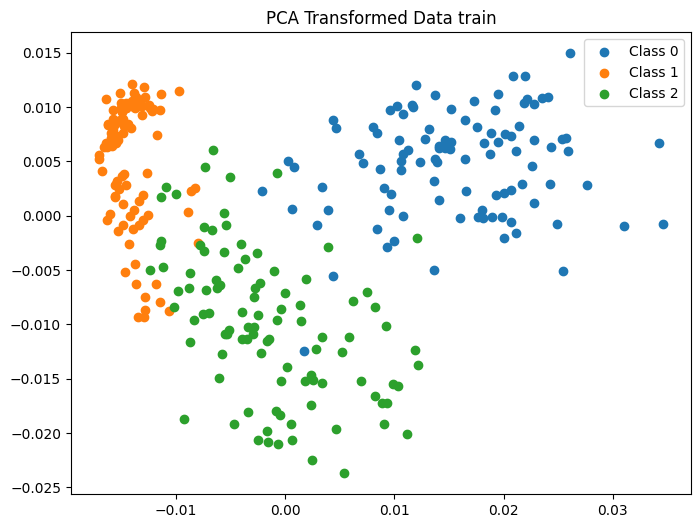

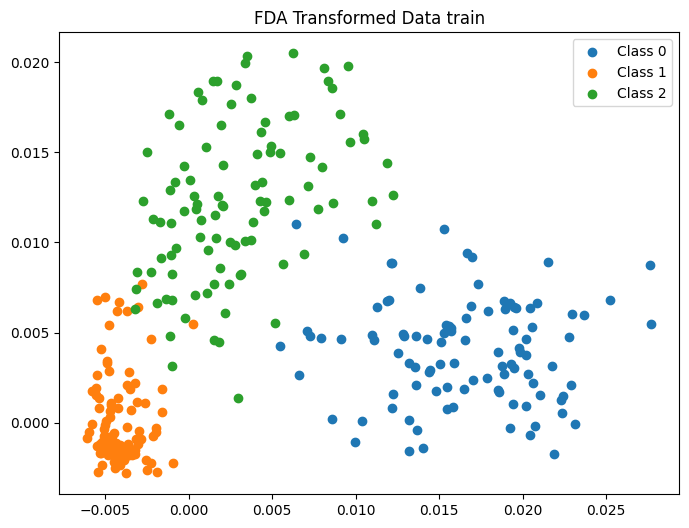

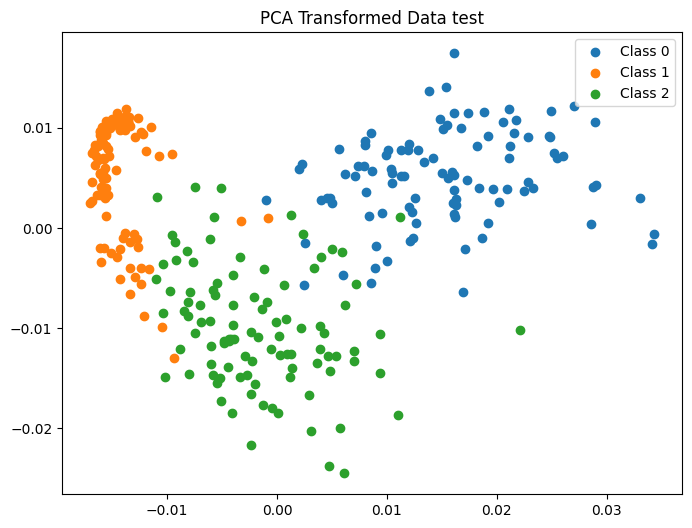

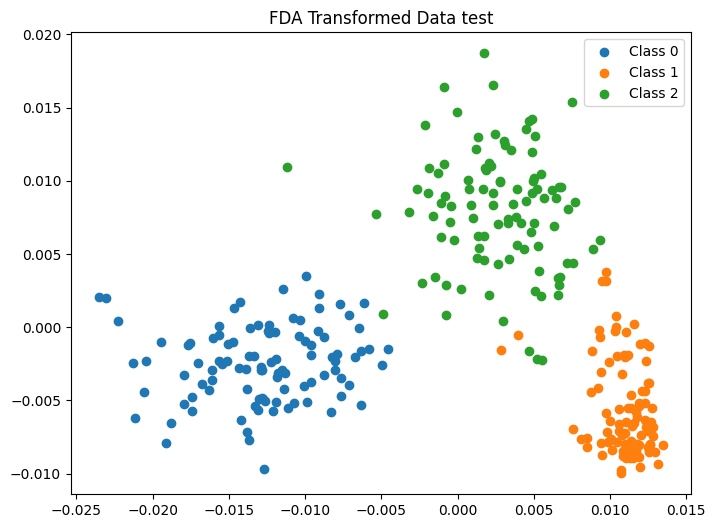

In [141]:
# Visualization
import matplotlib.pyplot as plt

visualize_2d(Y_train, y_train, "PCA Transformed Data train")
visualize_2d(X_fda_train, y_train, "FDA Transformed Data train")


visualize_2d(Y_test, y_test, "PCA Transformed Data test")
visualize_2d(X_fda_test, y_test, "FDA Transformed Data test")

4 PCA for first two components

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
def apply_pca_two_components(X):
    """Apply PCA and retain only the first two principal components."""
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X

    # Compute covariance matrix
    covariance_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select only the first two principal components
    U_p2 = eigenvectors[:, :2]

    # Transform data
    Y = np.dot(X_centered, U_p2)
    return Y, U_p2, mean_X

# Apply PCA (2 components)
Y_train_2D, U_p2, mean_X_2D = apply_pca_two_components(X_train)
Y_test_2D = np.dot(X_test - mean_X_2D, U_p2)

# Train LDA on reduced 2D features
lda = LinearDiscriminantAnalysis()
lda.fit(Y_train_2D, y_train)

# Predict and compute accuracy for LDA
train_pred_lda = lda.predict(Y_train_2D)
test_pred_lda = lda.predict(Y_test_2D)

train_acc_lda = accuracy_score(y_train, train_pred_lda)
test_acc_lda = accuracy_score(y_test, test_pred_lda)

print(f"LDA Accuracy with 2 Principal Components - Train: {train_acc_lda:.4f}, Test: {test_acc_lda:.4f}")

# Train QDA on reduced 2D features
qda = QuadraticDiscriminantAnalysis()
qda.fit(Y_train_2D, y_train)

# Predict and compute accuracy for QDA
train_pred_qda = qda.predict(Y_train_2D)
test_pred_qda = qda.predict(Y_test_2D)

train_acc_qda = accuracy_score(y_train, train_pred_qda)
test_acc_qda = accuracy_score(y_test, test_pred_qda)

print(f"QDA Accuracy with 2 Principal Components - Train: {train_acc_qda:.4f}, Test: {test_acc_qda:.4f}")


LDA Accuracy with 2 Principal Components - Train: 0.9000, Test: 0.9300
QDA Accuracy with 2 Principal Components - Train: 0.9367, Test: 0.9433


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [144]:
print("train pca\n")
# Train and classify using LDA
lda_means, lda_cov = train_lda(Y_train_2D, y_train)
predictions_lda = classify_lda(Y_train_2D, lda_means, lda_cov)

# Train and classify using QDA
qda_means, qda_covs = train_qda(Y_train_2D, y_train)
predictions_qda = classify_qda(Y_train_2D, qda_means, qda_covs)

# Print classification results
print(f"LDA Predictions: {predictions_lda}")
print(f"QDA Predictions: {predictions_qda}")

# Evaluate accuracy
accuracy_lda = np.mean(predictions_lda == y_train)
accuracy_qda = np.mean(predictions_qda == y_train)

print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)
print("\ntest pca\n")
# Train and classify using LDA
lda_means, lda_cov = train_lda(Y_test_2D, y_test)
predictions_lda = classify_lda(Y_test_2D, lda_means, lda_cov)

# Train and classify using QDA
qda_means, qda_covs = train_qda(Y_test_2D, y_test)
predictions_qda = classify_qda(Y_test_2D, qda_means, qda_covs)

# Print classification results
print(f"LDA Predictions: {predictions_lda}")
print(f"QDA Predictions: {predictions_qda}")

# Evaluate accuracy
accuracy_lda = np.mean(predictions_lda == y_test)
accuracy_qda = np.mean(predictions_qda == y_test)

print("LDA Accuracy:", accuracy_lda)
print("QDA Accuracy:", accuracy_qda)

train pca

LDA Predictions: [2 2 0 2 0 0 0 2 2 2 1 2 0 2 2 2 0 2 2 0 0 0 2 0 0 0 0 0 2 1 0 2 1 0 2 2 2
 0 0 0 2 2 2 2 0 0 0 2 0 1 2 1 2 2 2 0 0 0 0 0 2 2 2 2 0 1 2 2 0 0 2 0 0 0
 2 2 1 2 0 0 0 2 2 2 0 0 2 2 0 0 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 2 0
 0 2 0 2 1 0 2 0 2 0 2 0 0 2 2 1 2 0 0 2 1 0 2 0 2 0 2 0 2 0 0 0 0 0 2 1 0
 2 0 0 2 0 0 2 1 0 0 2 0 2 0 0 2 0 0 2 0 2 0 2 2 1 2 0 2 0 2 2 0 0 0 2 2 0
 0 1 0 2 2 0 0 2 0 0 2 0 0 2 0 0 2 2 2 2 0 0 0 0 2 0 0 0 1 0 2 2 0 0 2 2 0
 2 0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 2 0 0 2 1 0 2 2 2 2 1 1 0 0 0 2 2 1 2 0 0
 1 0 2 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 2 0 0 0
 2 1 2 2]
QDA Predictions: [2 0 0 2 0 0 0 2 2 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 2 2
 0 0 0 0 2 2 2 0 0 0 2 0 0 2 1 2 2 2 0 0 0 0 0 2 2 2 2 0 1 2 2 0 0 2 0 0 0
 2 2 0 2 0 0 0 0 2 2 0 0 2 0 0 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 0 0 0 2 0
 0 1 0 2 0 0 0 0 2 0 2 0 0 2 2 2 2 0 0 2 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 

accuracy evidentally drops

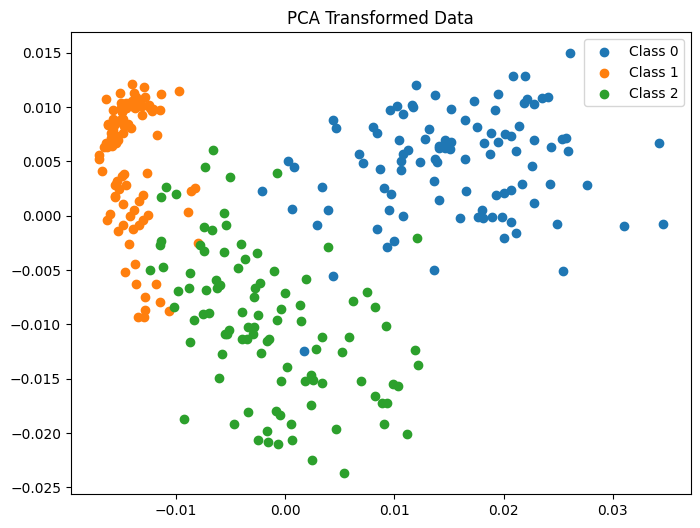

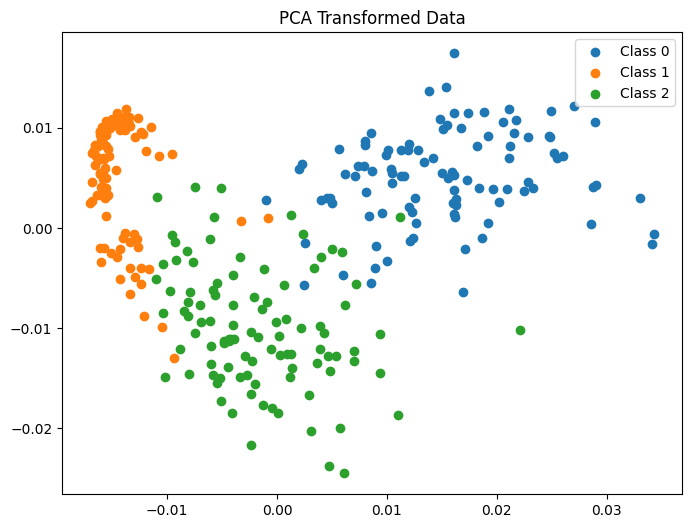

In [ ]:
visualize_2d(Y_train_2D, y_train, "PCA Transformed Data train")
visualize_2d(Y_test_2D, y_test, "PCA Transformed Data test")
